# **Titanic Shipwreck.**
**Use machine learning to create a model that predicts which passengers survived the Titanic shipwreck.**

**Libraries**

In [702]:
import pandas as pd
from pandas_profiling import ProfileReport
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

**Load the data**

In [703]:
titanic_train = pd.read_csv('train.csv')
titanic_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [704]:
titanic_test = pd.read_csv('test.csv')
titanic_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [705]:
passengers = titanic_train.copy()

**Check for missing values**

In [706]:
def print_missing_values(dataset):
    
    df = pd.DataFrame(dataset)

    missing_values_count = df.isnull().sum()
    missing_values_percentage = (missing_values_count / len(df)) * 100

    missing_values_table = pd.DataFrame({
        'Count': missing_values_count,
        'Percentage': missing_values_percentage
    })

    missing_values_table = missing_values_table[missing_values_table['Count'] > 0]

    print("Columns with missing values:")
    print()
    print(missing_values_table)

print_missing_values(titanic_train)

Columns with missing values:

          Count  Percentage
Age         177   19.865320
Cabin       687   77.104377
Embarked      2    0.224467


**Check for duplicates**

In [707]:
titanic_train.duplicated().sum()

0

In [708]:
def find_duplicates(data):

  df = pd.DataFrame(data)

  duplicate_rows = df[df.duplicated()]

  print(duplicate_rows)

find_duplicates(titanic_train)

Empty DataFrame
Columns: [PassengerId, Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked]
Index: []


## **Initial EDA**

In [709]:
# create a data report
#profile = ProfileReport(titanic_train)

#profile.to_file('train_report.html')

From the data report, `Cabin` has a high number of  missing values thus it'll be dropped.<br>
`Age` has 177 missing values and this rows will be dropped.<br>
`Embarked` has only 2 missing values which will be filled with the mode.

# **Cleaning**

In [710]:
# dropping column
titanic_train.drop(['Cabin','Fare','Ticket','Name', 'PassengerId'], axis=1, inplace=True)

# dropping missing values
titanic_train["Age"].fillna(titanic_train["Age"].mean(), inplace=True)
titanic_train["Age"] = titanic_train["Age"].astype(int)

In [711]:
titanic_train

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22,1,0,S
1,1,1,female,38,1,0,C
2,1,3,female,26,0,0,S
3,1,1,female,35,1,0,S
4,0,3,male,35,0,0,S
...,...,...,...,...,...,...,...
886,0,2,male,27,0,0,S
887,1,1,female,19,0,0,S
888,0,3,female,29,1,2,S
889,1,1,male,26,0,0,C


### **Test Data**

In [712]:
titanic_test.drop(['Cabin','Fare','Ticket','Name'], axis=1, inplace=True)
titanic_test["Age"].fillna(titanic_test["Age"].mean(), inplace=True)
titanic_test["Age"] = titanic_test["Age"].astype(int)

In [713]:
titanic_test

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Embarked
0,892,3,male,34,0,0,Q
1,893,3,female,47,1,0,S
2,894,2,male,62,0,0,Q
3,895,3,male,27,0,0,S
4,896,3,female,22,1,1,S
...,...,...,...,...,...,...,...
413,1305,3,male,30,0,0,S
414,1306,1,female,39,0,0,C
415,1307,3,male,38,0,0,S
416,1308,3,male,30,0,0,S


# **EDA**

In [714]:
def distribution(df, col):
    sns.histplot(df, x=col)
    plt.title(f'Distribution of {col}')
    plt.show()

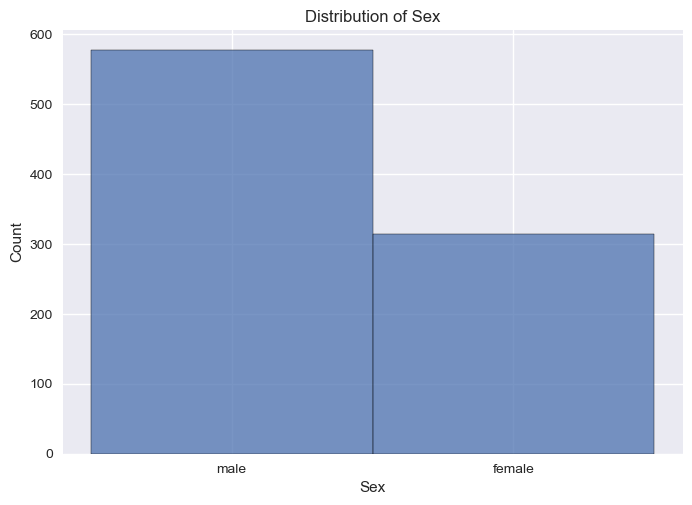

In [715]:
# Distribution of features in the clean data
distribution(titanic_train, 'Sex')

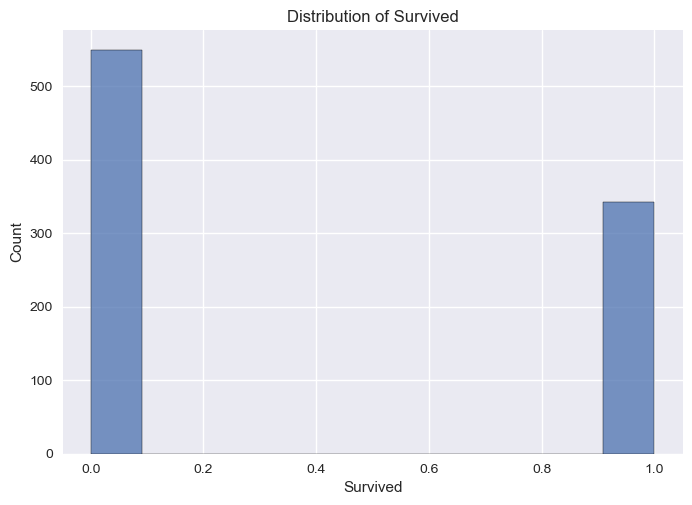

In [716]:
distribution(titanic_train, 'Survived')

In [717]:
titanic_train.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [718]:
titanic_train

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22,1,0,S
1,1,1,female,38,1,0,C
2,1,3,female,26,0,0,S
3,1,1,female,35,1,0,S
4,0,3,male,35,0,0,S
...,...,...,...,...,...,...,...
886,0,2,male,27,0,0,S
887,1,1,female,19,0,0,S
888,0,3,female,29,1,2,S
889,1,1,male,26,0,0,C


# **Feature Engineering**

### **Test Data**

In [719]:
titanic_test['Pclass'] = titanic_test["Pclass"].replace([1,2,3], ['Upper', 'Middle', 'Lower'])
titanic_test['Embarked'] = titanic_test["Embarked"].replace(['S', 'C', 'Q'], ['Southampton', 'Cherbourg', 'Queenstown'])

In [720]:
titanic_test

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Embarked
0,892,Lower,male,34,0,0,Queenstown
1,893,Lower,female,47,1,0,Southampton
2,894,Middle,male,62,0,0,Queenstown
3,895,Lower,male,27,0,0,Southampton
4,896,Lower,female,22,1,1,Southampton
...,...,...,...,...,...,...,...
413,1305,Lower,male,30,0,0,Southampton
414,1306,Upper,female,39,0,0,Cherbourg
415,1307,Lower,male,38,0,0,Southampton
416,1308,Lower,male,30,0,0,Southampton


In [721]:
print_missing_values(titanic_test)

Columns with missing values:

Empty DataFrame
Columns: [Count, Percentage]
Index: []


In [722]:
titanic_train

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22,1,0,S
1,1,1,female,38,1,0,C
2,1,3,female,26,0,0,S
3,1,1,female,35,1,0,S
4,0,3,male,35,0,0,S
...,...,...,...,...,...,...,...
886,0,2,male,27,0,0,S
887,1,1,female,19,0,0,S
888,0,3,female,29,1,2,S
889,1,1,male,26,0,0,C


In [723]:
titanic_train.dtypes

Survived     int64
Pclass       int64
Sex         object
Age          int32
SibSp        int64
Parch        int64
Embarked    object
dtype: object

In [724]:
titanic_train['Pclass'] = titanic_train["Pclass"].replace([1,2,3], ['Upper', 'Middle', 'Lower'])
titanic_train['Embarked'] = titanic_train["Embarked"].replace(['S', 'C', 'Q'], ['Southampton', 'Cherbourg', 'Queenstown'])

In [725]:
titanic_train.Embarked.value_counts()

Southampton    644
Cherbourg      168
Queenstown      77
Name: Embarked, dtype: int64

In [726]:
titanic_train

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,Lower,male,22,1,0,Southampton
1,1,Upper,female,38,1,0,Cherbourg
2,1,Lower,female,26,0,0,Southampton
3,1,Upper,female,35,1,0,Southampton
4,0,Lower,male,35,0,0,Southampton
...,...,...,...,...,...,...,...
886,0,Middle,male,27,0,0,Southampton
887,1,Upper,female,19,0,0,Southampton
888,0,Lower,female,29,1,2,Southampton
889,1,Upper,male,26,0,0,Cherbourg


In [727]:
# One-Hot Encode Categorical Columns
# from sklearn.preprocessing import OneHotEncoder

# cat_columns = ['Pclass', 'Sex', 'Embarked']
# ohe = OneHotEncoder(categories = 'auto', sparse = False, handle_unknown='ignore')

# ohe.fit(titanic_train[cat_columns])

# new_cat_columns = ohe.get_feature_names(input_features=cat_columns)

# columns = pd.DataFrame(ohe.fit_transform(titanic_train[cat_columns]), columns = new_cat_columns, index=titanic_train.index)

# titanic_train = pd.concat([titanic_train.drop(cat_columns, axis=1), columns], axis=1)

In [728]:
titanic_train

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,Lower,male,22,1,0,Southampton
1,1,Upper,female,38,1,0,Cherbourg
2,1,Lower,female,26,0,0,Southampton
3,1,Upper,female,35,1,0,Southampton
4,0,Lower,male,35,0,0,Southampton
...,...,...,...,...,...,...,...
886,0,Middle,male,27,0,0,Southampton
887,1,Upper,female,19,0,0,Southampton
888,0,Lower,female,29,1,2,Southampton
889,1,Upper,male,26,0,0,Cherbourg


In [729]:
titanic_train = pd.get_dummies(titanic_train)
titanic_train

,Survived,Age,SibSp,Parch,Pclass_Lower,Pclass_Middle,Pclass_Upper,Sex_female,Sex_male,Embarked_Cherbourg,Embarked_Queenstown,Embarked_Southampton
0,0,22,1,0,1,0,0,0,1,0,0,1
1,1,38,1,0,0,0,1,1,0,1,0,0
2,1,26,0,0,1,0,0,1,0,0,0,1
3,1,35,1,0,0,0,1,1,0,0,0,1
4,0,35,0,0,1,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,27,0,0,0,1,0,0,1,0,0,1
887,1,19,0,0,0,0,1,1,0,0,0,1
888,0,29,1,2,1,0,0,1,0,0,0,1
889,1,26,0,0,0,0,1,0,1,1,0,0


**Normalization**

In [730]:
# from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler()

# columns_to_scale = ['Age', 'SibSp', 'Parch']


# titanic_train[columns_to_scale] = scaler.fit_transform(titanic_train[columns_to_scale])

# titanic_train

## **MODELING**

In [731]:
X = titanic_train.drop('Survived', axis=1)
y = titanic_train['Survived']

In [732]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Baseline Model

In [733]:
X_test

,Age,SibSp,Parch,Pclass_Lower,Pclass_Middle,Pclass_Upper,Sex_female,Sex_male,Embarked_Cherbourg,Embarked_Queenstown,Embarked_Southampton
709,29,1,1,1,0,0,0,1,1,0,0
439,31,0,0,0,1,0,0,1,0,0,1
840,20,0,0,1,0,0,0,1,0,0,1
720,6,0,1,0,1,0,1,0,0,0,1
39,14,1,0,1,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
433,17,0,0,1,0,0,0,1,0,0,1
773,29,0,0,1,0,0,0,1,1,0,0
25,38,1,5,1,0,0,1,0,0,0,1
84,17,0,0,0,1,0,1,0,0,0,1


In [734]:
passenger_709 = passengers[passengers['PassengerId'] == 10]
passenger_709

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [735]:
from sklearn.linear_model import LogisticRegression

logit = LogisticRegression(fit_intercept=False, C=1e12, solver='liblinear')
logit.fit(X_train, y_train)
y_pred = logit.predict(X_test)
y_pred

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1], dtype=int64)

In [736]:
logit.score(X_test, y_test)

0.8100558659217877

In [737]:
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay, confusion_matrix, roc_curve, auc

In [738]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8100558659217877

In [739]:
def plot_confusion(y_test, y_predicted):
    labels = {0: 'Dead', 1: 'Survived'}
    labels = [labels[key] for key in sorted(labels.keys())]
    cf = confusion_matrix(y_test, y_predicted)
    disp = ConfusionMatrixDisplay(confusion_matrix = cf, display_labels=labels)


    disp.plot()
    plt.grid(False)


    plt.show()

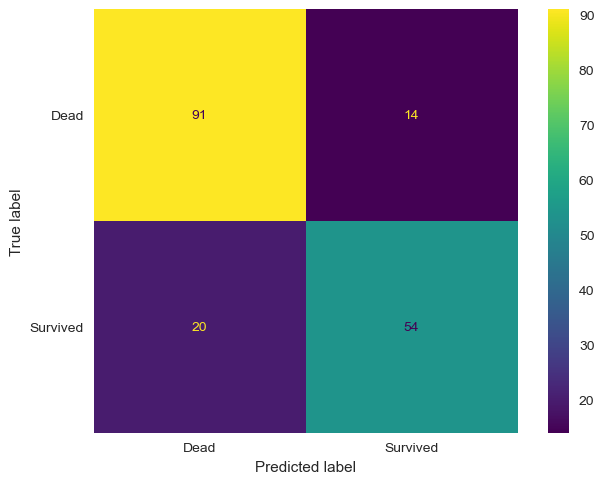

In [740]:
plot_confusion(y_test, y_pred)

In [741]:
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.87      0.84       105
           1       0.79      0.73      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



In [742]:
def plot_roc(model, X_train, y_train, X_test, y_test):
    y_score = model.fit(X_train, y_train).decision_function(X_test)
    fpr, tpr, thresholds = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize = (8,5))
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.show()

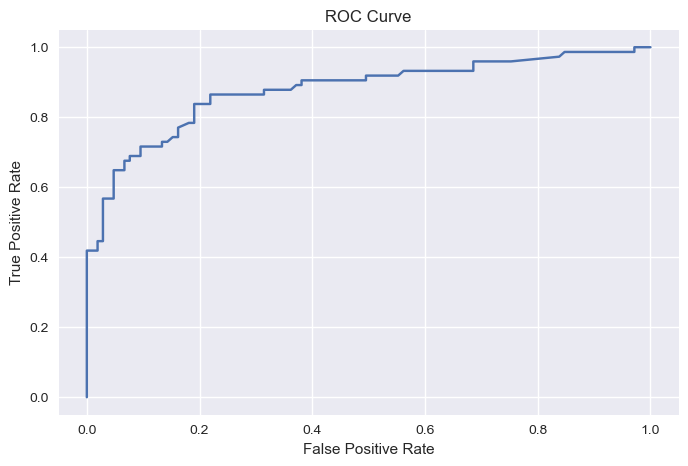

In [743]:
plot_roc(logit, X_train, y_train, X_test, y_test)

### Decision Trees

In [744]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [745]:
clf = DecisionTreeClassifier(criterion='entropy')
clf.fit(X_train, y_train)
y_pred_clf = clf.predict(X_test)
y_pred_clf

array([0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0], dtype=int64)

In [746]:
accuracy = accuracy_score(y_test, y_pred_clf)
accuracy

0.7821229050279329

In [747]:
report = classification_report(y_test, y_pred_clf)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.86      0.82       105
           1       0.77      0.68      0.72        74

    accuracy                           0.78       179
   macro avg       0.78      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179



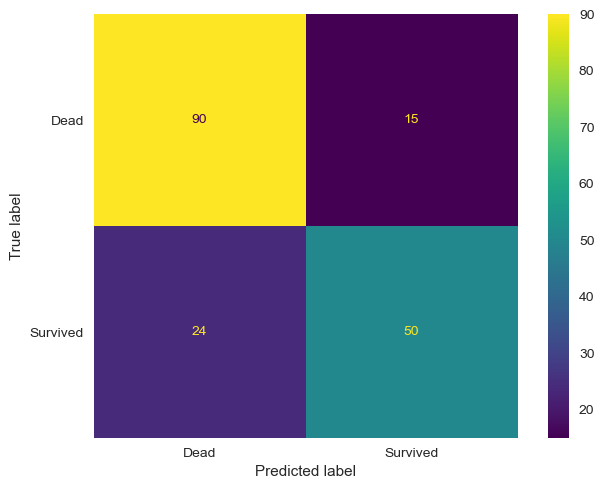

In [748]:
plot_confusion(y_test, y_pred_clf)

In [749]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

predict = xgb.predict(X_test)
predict

array([0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1])

In [750]:
xgb.score(X_test, y_test)

0.8100558659217877

In [751]:
accuracy = accuracy_score(y_test, predict)
accuracy

0.8100558659217877

In [752]:
from catboost import CatBoostClassifier

cbc = CatBoostClassifier()
cbc.fit(X_train, y_train)

pred = cbc.predict(X_test)
pred

Learning rate set to 0.008911
0:	learn: 0.6873048	total: 3.73ms	remaining: 3.73s
1:	learn: 0.6819983	total: 8.15ms	remaining: 4.07s
2:	learn: 0.6756575	total: 12ms	remaining: 3.97s
3:	learn: 0.6704997	total: 14.6ms	remaining: 3.63s
4:	learn: 0.6651599	total: 17.6ms	remaining: 3.5s
5:	learn: 0.6592497	total: 22.2ms	remaining: 3.68s
6:	learn: 0.6552471	total: 25.1ms	remaining: 3.57s
7:	learn: 0.6495724	total: 29.3ms	remaining: 3.64s
8:	learn: 0.6449623	total: 35.3ms	remaining: 3.89s
9:	learn: 0.6403689	total: 38.8ms	remaining: 3.84s
10:	learn: 0.6376150	total: 40.6ms	remaining: 3.65s
11:	learn: 0.6337678	total: 44.9ms	remaining: 3.69s
12:	learn: 0.6286368	total: 48.2ms	remaining: 3.66s
13:	learn: 0.6237703	total: 52.7ms	remaining: 3.71s
14:	learn: 0.6190687	total: 56.8ms	remaining: 3.73s
15:	learn: 0.6143825	total: 61.2ms	remaining: 3.76s
16:	learn: 0.6100148	total: 64.7ms	remaining: 3.74s
17:	learn: 0.6055323	total: 69.7ms	remaining: 3.8s
18:	learn: 0.6012643	total: 78ms	remaining: 4.03

658:	learn: 0.3403585	total: 3.41s	remaining: 1.76s
659:	learn: 0.3402593	total: 3.42s	remaining: 1.76s
660:	learn: 0.3399974	total: 3.42s	remaining: 1.75s
661:	learn: 0.3398073	total: 3.43s	remaining: 1.75s
662:	learn: 0.3397457	total: 3.43s	remaining: 1.74s
663:	learn: 0.3395339	total: 3.44s	remaining: 1.74s
664:	learn: 0.3395136	total: 3.44s	remaining: 1.73s
665:	learn: 0.3394222	total: 3.45s	remaining: 1.73s
666:	learn: 0.3393388	total: 3.46s	remaining: 1.73s
667:	learn: 0.3392160	total: 3.47s	remaining: 1.73s
668:	learn: 0.3391067	total: 3.48s	remaining: 1.72s
669:	learn: 0.3390251	total: 3.48s	remaining: 1.72s
670:	learn: 0.3387893	total: 3.49s	remaining: 1.71s
671:	learn: 0.3387648	total: 3.49s	remaining: 1.71s
672:	learn: 0.3387083	total: 3.5s	remaining: 1.7s
673:	learn: 0.3386787	total: 3.5s	remaining: 1.69s
674:	learn: 0.3385987	total: 3.51s	remaining: 1.69s
675:	learn: 0.3385790	total: 3.51s	remaining: 1.68s
676:	learn: 0.3384864	total: 3.51s	remaining: 1.68s
677:	learn: 0.3

array([0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1], dtype=int64)

In [753]:
cbc.score(X_test, y_test)

0.8212290502793296

In [754]:
accur = accuracy_score(y_test, pred)
accur

0.8212290502793296

In [755]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_smote,y_smote = smote.fit_resample(X_train, y_train)

In [756]:
cbc2 = cbc.fit(X_smote, y_smote)

prediction = cbc2.predict(X_test)
prediction

Learning rate set to 0.009793
0:	learn: 0.6869169	total: 5.13ms	remaining: 5.13s
1:	learn: 0.6789456	total: 9.24ms	remaining: 4.61s
2:	learn: 0.6709529	total: 13.4ms	remaining: 4.44s
3:	learn: 0.6635847	total: 17.6ms	remaining: 4.39s
4:	learn: 0.6562245	total: 21.4ms	remaining: 4.27s
5:	learn: 0.6508445	total: 25ms	remaining: 4.15s
6:	learn: 0.6439159	total: 28.9ms	remaining: 4.09s
7:	learn: 0.6372436	total: 36.3ms	remaining: 4.5s
8:	learn: 0.6304321	total: 44.2ms	remaining: 4.86s
9:	learn: 0.6250395	total: 48.6ms	remaining: 4.81s
10:	learn: 0.6187655	total: 54.3ms	remaining: 4.88s
11:	learn: 0.6123851	total: 60.9ms	remaining: 5.02s
12:	learn: 0.6083290	total: 64ms	remaining: 4.86s
13:	learn: 0.6022661	total: 69.8ms	remaining: 4.91s
14:	learn: 0.5965231	total: 73.3ms	remaining: 4.81s
15:	learn: 0.5912437	total: 79.6ms	remaining: 4.9s
16:	learn: 0.5855918	total: 84.6ms	remaining: 4.89s
17:	learn: 0.5809444	total: 88.4ms	remaining: 4.82s
18:	learn: 0.5759233	total: 93.1ms	remaining: 4.8s

85:	learn: 0.4263838	total: 383ms	remaining: 4.07s
86:	learn: 0.4256935	total: 388ms	remaining: 4.07s
87:	learn: 0.4240732	total: 391ms	remaining: 4.06s
88:	learn: 0.4232471	total: 398ms	remaining: 4.08s
89:	learn: 0.4224278	total: 402ms	remaining: 4.06s
90:	learn: 0.4212228	total: 408ms	remaining: 4.07s
91:	learn: 0.4200430	total: 413ms	remaining: 4.08s
92:	learn: 0.4189580	total: 417ms	remaining: 4.07s
93:	learn: 0.4181043	total: 433ms	remaining: 4.17s
94:	learn: 0.4177386	total: 438ms	remaining: 4.17s
95:	learn: 0.4161601	total: 447ms	remaining: 4.21s
96:	learn: 0.4153458	total: 452ms	remaining: 4.21s
97:	learn: 0.4141540	total: 456ms	remaining: 4.2s
98:	learn: 0.4135537	total: 462ms	remaining: 4.2s
99:	learn: 0.4124355	total: 467ms	remaining: 4.2s
100:	learn: 0.4114420	total: 472ms	remaining: 4.2s
101:	learn: 0.4106769	total: 477ms	remaining: 4.2s
102:	learn: 0.4096257	total: 482ms	remaining: 4.19s
103:	learn: 0.4086196	total: 489ms	remaining: 4.21s
104:	learn: 0.4079223	total: 493

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1], dtype=int64)

In [757]:
cbc2.score(X_test, y_test)

0.8379888268156425

In [758]:
test = pd.get_dummies(titanic_test)
test

,PassengerId,Age,SibSp,Parch,Pclass_Lower,Pclass_Middle,Pclass_Upper,Sex_female,Sex_male,Embarked_Cherbourg,Embarked_Queenstown,Embarked_Southampton
0,892,34,0,0,1,0,0,0,1,0,1,0
1,893,47,1,0,1,0,0,1,0,0,0,1
2,894,62,0,0,0,1,0,0,1,0,1,0
3,895,27,0,0,1,0,0,0,1,0,0,1
4,896,22,1,1,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,30,0,0,1,0,0,0,1,0,0,1
414,1306,39,0,0,0,0,1,1,0,1,0,0
415,1307,38,0,0,1,0,0,0,1,0,0,1
416,1308,30,0,0,1,0,0,0,1,0,0,1
